# Main Libraries

In [10]:
# quandl for financial data
import quandl
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 

#rcParams style for plots
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data from Quandl

In [30]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'
#tesla data from quandl
tesla = quandl.get('WIKI/TSLA')
#GM data from quandl
gm = quandl.get('WIKI/GM')

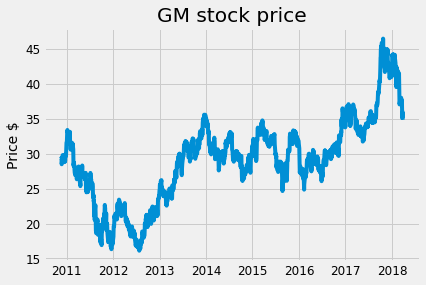

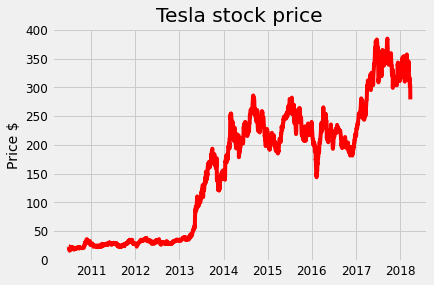

In [31]:
# Quick Visualization
#GM plot
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM stock price')
plt.ylabel('Price $');
plt.show()

#Tesla plot
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla stock price')
plt.ylabel('Price $');
plt.show();


In [32]:
# Compute market capitalization, mutiply the average number of shares outstanding in each year times the share price
tesla_shares = {2018: 168e6, 2017:162e6, 2016:144e6, 2015:128e6, 2014:125e6, 2013:119e6, 2012:107e6, 2011:100e6, 2010:51e6}
gm_shares = {2018: 1.42e9, 2017:1.5e9, 2016:1.54e9, 2015:1.59e9, 2014:1.61e9, 2013:1.39e9, 2012:1.57e9, 2011:1.54e9, 2010:1.5e9}

In [36]:
# Calculate market capitalization creating a year column
tesla['Year'] = pd.DatetimeIndex(tesla.index).year
# Take dates frin index and remove date column
tesla.reset_index(level =0, inplace = True)
tesla['cap'] =0


In [44]:
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.cap[i] = shares * tesla['Adj. Close'][i]

<ipython-input-44-afd3e02cc565>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.cap[i] = shares * tesla['Adj. Close'][i]


In [47]:
# Calculate market capitalization creating a year column
gm['Year'] = pd.DatetimeIndex(gm.index).year
# Take dates frin index and remove date column
gm.reset_index(level =0, inplace = True)
gm['cap'] =0
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.cap[i] = shares * gm['Adj. Close'][i]

<ipython-input-47-67f09edb71eb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm.cap[i] = shares * gm['Adj. Close'][i]
